<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CUxx_Nombre del caso de uso</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > III - Feature Engineering Domain </font>
***
> # <font color='steelblue'> <b>19.- Feature Transforms</font>

<font color='steelblue'>Feature Transform (Polynomial Features Transform) is the process to create new features by raising existing features to an exponent, in order to see if they improve model performance, when the input features interact in unexpected and often nonlinear ways.</font>


## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Feature Transforms</b>

- Perform Polynomial Features Transform
- Evaluate a KNN model


## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: xxxxxxxxxx</font>
- <font color='steelblue'> <b>Output File: xxxxxxxxxx</font>

## <font color='green'>Settings</font>

In [1]:
# Libraries to use
import os
from pathlib import Path
import pandas as pd
import easygui as GUI
import numpy as np
import matplotlib.pyplot

## <font color='green'>Data Load</font>

In [4]:
current_path = os.getcwd()
path_origen = current_path
# Obtenemos el nombre del entorno que es el nombre del directorio raiz
raiz  = os.environ.get('CONDA_DEFAULT_ENV')
# Nos situamos en el directorio donde está el fichero (código) para carga de datos
os.chdir('C:\\' + raiz.__str__() + '\\CODE\\X - COMMON PROCEDURES\\')
# Ejecutamos el fichero
%run -i load_data.py
# No posicionamos de nuevo en el directorio origen
os.chdir(path_origen)
# Visualizamos el fichero cargado
data.head()

Uploaded File:
File name: diabetes.csv
File size:  (768, 9)
 
Generated Variables to use:
path_default: C:\Kapreolus\USE CASES\CLASSIFICATION\Binary\Diabetes\
path_data: C:\Kapreolus\USE CASES\CLASSIFICATION\Binary\Diabetes\Data\
file_data: C:\Kapreolus\USE CASES\CLASSIFICATION\Binary\Diabetes\Data\diabetes.csv
file_name: diabetes
Other variables: data, X, y, X_names, target(or y_name), target_index


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
from sklearn.model_selection import train_test_split

dataset = data.values

data_trans = data.values
# separate into input and output columns
X = data_trans[:, :-1]
y = data_trans[:, -1]

# separate into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (139, 60) (139,)
Test (69, 60) (69,)


## Polynomial Features Transform

Use dataset as example: sonar data

Use dataset as example: Sonar

Ref: 

*Jason Brownlee (2020). D⁠a⁠t⁠a⁠ ⁠P⁠r⁠e⁠p⁠a⁠r⁠a⁠t⁠i⁠on⁠ ⁠f⁠o⁠r⁠ ⁠⁠M⁠a⁠c⁠h⁠i⁠n⁠e⁠ ⁠L⁠e⁠a⁠r⁠n⁠i⁠n⁠g Data Cleaning, Feature Selection, and Data Transforms in Python. Chapter 23 How to Derive New Input Variables*

### Evaluating a KNN model

#### Evaluating without tranform

In [14]:
# evaluate knn on the raw dataset
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


#### Evaluating Polynomial Features Tranform

In [15]:
# evaluate knn on the dataset with polynomial features transform
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# define the pipeline
trans = PolynomialFeatures(degree=3)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.800 (0.077)


##### Exploring varying degree in the polynomial transform.

<font color='tomato'>Range of degree in the polynomial transform</font>

In [25]:

# Range of degree in the polynomial transform
deg_i=1
deg_f=3

<font color='darkgrey'><b>Operation</font>

>1 0.797 (0.073)
>2 0.793 (0.085)
>3 0.800 (0.077)


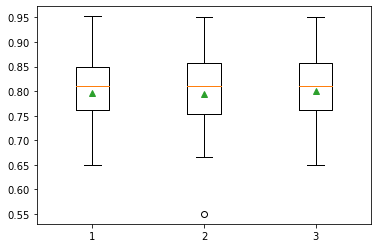

In [26]:
# explore the effect of degree on accuracy for the polynomial features transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# get a list of models to evaluate
def get_models():
    models = dict()
    for d in range(deg_i, deg_f+1):
        # define the pipeline
        trans = PolynomialFeatures(degree=d)
        model = KNeighborsClassifier()
        models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

    # plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


### Polynomial Features Transform

<font color='tomato'>Select features to Normalizate</font>

In [20]:
# Select features to Normalizate
data_transf = data.values[:, :-1] # Input but not Target
# Degree in the polynomial transform
deg=3

<font color='darkgrey'><b>Operation</font>

In [21]:
from sklearn.preprocessing import MinMaxScaler
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=deg)
data_transf = trans.fit_transform(data_transf)
# convert the array back to a dataframe
dataset = pd.DataFrame(data_transf)
# summarize
print(dataset.describe())

       0           1           2           3           4           5      \
count  208.0  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     1.0    0.029164    0.038437    0.043832    0.053892    0.075202   
std      0.0    0.022991    0.032960    0.038428    0.046528    0.055552   
min      1.0    0.001500    0.000600    0.001500    0.005800    0.006700   
25%      1.0    0.013350    0.016450    0.018950    0.024375    0.038050   
50%      1.0    0.022800    0.030800    0.034300    0.044050    0.062500   
75%      1.0    0.035550    0.047950    0.057950    0.064500    0.100275   
max      1.0    0.137100    0.233900    0.305900    0.426400    0.401000   

            6           7           8           9      ...         39701  \
count  208.000000  208.000000  208.000000  208.000000  ...  2.080000e+02   
mean     0.104570    0.121747    0.134799    0.178003  ...  2.055791e-06   
std      0.059105    0.061788    0.085152    0.118387  ...  7.671996e-06   
min      0.

In [19]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000015EA31C78B8> (for post_execute):


KeyboardInterrupt: 

<font color='tomato'>Select Data to concatenate to transformed data</font>

In [ ]:
# Data to concatenate to transformed data
d=data[target] # Output

<font color='darkgrey'><b>Operation</font>

In [ ]:
# Generate new data set
new_data=pd.concat([dataset, d], axis=1)
new_data.columns=data.columns
data=new_data
data.head()

## <font color='green'>Data Save</font>

<font color='tomato'> Identificamos los datos a guardar</font>

In [7]:
data_to_save = data

<font color='tomato'>Extensión añadida al nombre del fichero: será el número del proceso que lo genera (e.g. diabetes_06).</font>

<font color='tomato'>En caso de generarse varios ficheros llevarán _01 _02 ... después (e.g. diabetes_06_01).</font>

In [8]:
# Proceso 07
extension='_07'

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [11]:
# Guardamos el fichero
file_save=basename(file_data).replace('.csv',extension+'.csv')
path_save="Data/Output/"+file_save
path_out=GUI.filesavebox(title='Save Data File',default=path_save)
data_to_save.to_csv(path_out, index=False)
print('Falie saved as:')
path_out

Falie saved as:


<font color='tomato'><b> OPCION B:</b> Uso del código que va a Pilot Deploy</font>

In [10]:
file_save=basename(file_name).replace('.csv',extension+'.csv')
data_to_save.to_csv('Data/Output/' + file_save, index=False)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

Ejemplos
- Se han modificado los nombres de las columnas
- Se han eliminado blancos en los nombres de las columnas
- Se han traducido los nombres de las columnas

## <font color=' #2874a6 '>Main Conclusions</font>

Ejemplos
- Los nombre de las columnas de origen son muy largos lo que provoca que ...
- ......

## <font color='RED'>CODE TO DEPLOY</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- xxxxxx
- xxxxxx
- xxxxxx

<font color=' red '><b>CODE</b></font>

In [1]:
# 
